In [25]:
import os
import json
import polars as pl
import polars.selectors as cs
from pathlib import Path
import pandas as pd

## Turn File into .parquet

In [26]:
INPUT_DIR = "data/iphone_samsung_1_comments_relevance"
OUTPUT_FILE = "all_comments.parquet"

In [27]:
def flatten_json(d, parent_key="", sep="_"):
    """Recursively flattens a nested JSON object into a dict with prefixed keys."""
    items = []
    for k, v in d.items():
        new_key = f"{parent_key}{sep}{k}" if parent_key else k
        if isinstance(v, dict):
            items.extend(flatten_json(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)

In [28]:
# Let's say you have multiple JSON files in a folder
data_folder = Path(INPUT_DIR)
rows = []

for file in data_folder.glob("*.json"):
    with open(file, "r", encoding="utf-8") as f:
        raw = json.load(f)
        for entry in raw.get("items", []):  # your "response" field
            rows.append(flatten_json(entry))

# Create Polars DataFrame
df = pl.DataFrame(rows)

# Save to parquet
df.write_parquet(OUTPUT_FILE)

## Data by relevance

In [29]:
df = pl.read_parquet("data/clean/samsung_iphone/all_comments.parquet")
df.head()

kind,etag,id,snippet_channelId,snippet_videoId,snippet_topLevelComment_kind,snippet_topLevelComment_etag,snippet_topLevelComment_id,snippet_topLevelComment_snippet_channelId,snippet_topLevelComment_snippet_videoId,snippet_topLevelComment_snippet_textDisplay,snippet_topLevelComment_snippet_textOriginal,snippet_topLevelComment_snippet_authorDisplayName,snippet_topLevelComment_snippet_authorProfileImageUrl,snippet_topLevelComment_snippet_authorChannelUrl,snippet_topLevelComment_snippet_authorChannelId_value,snippet_topLevelComment_snippet_canRate,snippet_topLevelComment_snippet_viewerRating,snippet_topLevelComment_snippet_likeCount,snippet_topLevelComment_snippet_publishedAt,snippet_topLevelComment_snippet_updatedAt,snippet_canReply,snippet_totalReplyCount,snippet_isPublic,replies_comments
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,bool,str,i64,str,str,bool,i64,bool,list[struct[4]]
"""youtube#commentThread""","""_45V5eeyikFErZ1rfrbsx_e2ntI""","""Ugyj3eqT605PdPKi8X14AaABAg""","""UCst-PM5gRep0iCpCbGMf9LA""","""8hu-plAi6_w""","""youtube#comment""","""fZHBo24HnVy386XtURPlZuzqoQY""","""Ugyj3eqT605PdPKi8X14AaABAg""","""UCst-PM5gRep0iCpCbGMf9LA""","""8hu-plAi6_w""","""Samsung needs to upgrade selfi…","""Samsung needs to upgrade selfi…","""@hubzymalone9562""","""https://yt3.ggpht.com/ytc/AIdr…","""http://www.youtube.com/@hubzym…","""UCEJPMMt1aXjqVzLKMgsfvwA""",true,"""none""",601,"""2025-09-13T18:40:43Z""","""2025-09-13T18:40:43Z""",true,37,true,"[{""youtube#comment"",""H1Z_ZkD0ZdPBaArOsS71nuV3xEA"",""Ugyj3eqT605PdPKi8X14AaABAg.AN0tFeS4DbHAN0wqE9OWHC"",{""UCst-PM5gRep0iCpCbGMf9LA"",""8hu-plAi6_w"",""100% this. The only reason I&#39;m getting the 17 Pro over the S26 Ultra."",""100% this. The only reason I'm getting the 17 Pro over the S26 Ultra."",""Ugyj3eqT605PdPKi8X14AaABAg"",""@rockowilson2320"",""https://yt3.ggpht.com/BaJlFzLkzbKkolzJq71PtjEAw1BXoeFsKVPtca7pyca9KzA3IEtGN-L2WNwENV0bDhmPAXWskg=s48-c-k-c0x00ffffff-no-rj"",""http://www.youtube.com/@rockowilson2320"",{""UCARwRoBtlcCgnUMXQtwkS4A""},true,""none"",24,""2025-09-13T19:12:04Z"",""2025-09-13T19:12:04Z""}}, {""youtube#comment"",""vBZbN1F_IZIxUZ_X3-FpL4b-MXI"",""Ugyj3eqT605PdPKi8X14AaABAg.AN0tFeS4DbHAN0xKmEoCxY"",{""UCst-PM5gRep0iCpCbGMf9LA"",""8hu-plAi6_w"",""and samsung ultra users mostly do not take a single selfie with that phone ever XD"",""and samsung ultra users mostly do not take a single selfie with that phone ever XD"",""Ugyj3eqT605PdPKi8X14AaABAg"",""@janoo85"",""https://yt3.ggpht.com/ytc/AIdro_l_H2N7MZcFTtMnPjnvdf3TzZsk8S8_1yvybpp4YDX1lA=s48-c-k-c0x00ffffff-no-rj"",""http://www.youtube.com/@janoo85"",{""UCOUdA-Gub_fhGyBZ3Mf0qbQ""},true,""none"",26,""2025-09-13T19:16:22Z"",""2025-09-13T19:16:22Z""}}, … {""youtube#comment"",""aKtYbT2cJaGnfWsPSYTi7Vdc7CQ"",""Ugyj3eqT605PdPKi8X14AaABAg.AN0tFeS4DbHAN14Z949P9P"",{""UCst-PM5gRep0iCpCbGMf9LA"",""8hu-plAi6_w"",""Dont ask Android to. If you want it, just get the iPhone. its not that hard."",""Dont ask Android to. If you want it, just get the iPhone. its not that hard."",""Ugyj3eqT605PdPKi8X14AaABAg"",""@smidgeondutchrabbit"",""https://yt3.ggpht.com/L1M_YUJ19jc7AxRfbTWXN2fyDycaLWy8v16QFOnj5m1mVQQXjHdJPzDHYUlOqFx44UKrsK3JIE4=s48-c-k-c0x00ffffff-no-rj"",""http://www.youtube.com/@smidgeondutchrabbit"",{""UCdwbJZ-DXWLHckvVL40lxRA""},true,""none"",0,""2025-09-13T20:28:14Z"",""2025-09-13T20:28:14Z""}}]"
"""youtube#commentThread""","""6ebP28zK2LKLdUExXwNPDbFZutM""","""UgzVX9iPqDoB2fAyk_94AaABAg""","""UCst-PM5gRep0iCpCbGMf9LA""","""8hu-plAi6_w""","""youtube#comment""","""aQHaKNjkqiy1fsXb_NApvBwm0o8""","""UgzVX9iPqDoB2fAyk_94AaABAg""","""UCst-PM5gRep0iCpCbGMf9LA""","""8hu-plAi6_w""","""I will never stop repeating th…","""I will never stop repeating th…","""@alex.o.official""","""https://yt3.ggpht.com/ytc/AIdr…","""http://www.youtube.com/@alex.o…","""UCP3x65eg1IGNq01kvuS4gnw""",true,"""none""",491,"""2025-09-13T19:09:51Z""","""2025-09-13T19:09:51Z""",true,35,true,"[{""youtube#comment"",""e7kE5dwrRAzO5mjmy6q1fDNvwwY"",""

In [30]:
df.shape

(3563, 25)

## Data by Chronological Order

In [31]:
df = pl.read_parquet("data/clean/chronological/comments.parquet")
df.head()

kind,etag,id,snippet_channelId,snippet_videoId,snippet_topLevelComment_kind,snippet_topLevelComment_etag,snippet_topLevelComment_id,snippet_topLevelComment_snippet_channelId,snippet_topLevelComment_snippet_videoId,snippet_topLevelComment_snippet_textDisplay,snippet_topLevelComment_snippet_textOriginal,snippet_topLevelComment_snippet_authorDisplayName,snippet_topLevelComment_snippet_authorProfileImageUrl,snippet_topLevelComment_snippet_authorChannelUrl,snippet_topLevelComment_snippet_authorChannelId_value,snippet_topLevelComment_snippet_canRate,snippet_topLevelComment_snippet_viewerRating,snippet_topLevelComment_snippet_likeCount,snippet_topLevelComment_snippet_publishedAt,snippet_topLevelComment_snippet_updatedAt,snippet_canReply,snippet_totalReplyCount,snippet_isPublic,replies_comments
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,bool,str,i64,str,str,bool,i64,bool,list[struct[4]]
"""youtube#commentThread""","""uQA-qS9CXMbmpJnBFzzYVKNAsvM""","""UgxJOtvRgP-TK-DDSbh4AaABAg""","""UCHkj014U2CQ2Nv0UZeYpE_A""","""kffacxfA7G4""","""youtube#comment""","""ftCX1u_cMcFYWvy1sForf9HYYlo""","""UgxJOtvRgP-TK-DDSbh4AaABAg""","""UCHkj014U2CQ2Nv0UZeYpE_A""","""kffacxfA7G4""","""Good reason holy grain""","""Good reason holy grain""","""@nishapatel-m8r""","""https://yt3.ggpht.com/ytc/AIdr…","""http://www.youtube.com/@nishap…","""UC1pcc2njrSbt9Dxvv7jCZcQ""",true,"""none""",1,"""2025-09-24T17:11:11Z""","""2025-09-24T17:11:11Z""",true,0,true,null
"""youtube#commentThread""","""4hudTL3Z5iN4pgKkkQbIulOJ5EM""","""UgxtC2RpNWCNRupMHvl4AaABAg""","""UCHkj014U2CQ2Nv0UZeYpE_A""","""kffacxfA7G4""","""youtube#comment""","""rTwa0LUA1izDUGc0PKXTIu-GiJg""","""UgxtC2RpNWCNRupMHvl4AaABAg""","""UCHkj014U2CQ2Nv0UZeYpE_A""","""kffacxfA7G4""","""anyone in 2025 ....... lets ga…","""anyone in 2025 ....... lets ga…","""@moloantoa8655""","""https://yt3.ggpht.com/sCWKiUE8…","""http://www.youtube.com/@moloan…","""UCHLFXF2C8LdrjPhH3Vi4dyA""",true,"""none""",56,"""2025-09-24T16:47:44Z""","""2025-09-24T16:47:44Z""",true,8,true,"[{""youtube#comment"",""aaOFfL5gP8hlrICa-lZ1PtGajTc"",""UgxtC2RpNWCNRupMHvl4AaABAg.ANT03nbSg30ANTQ5hnoIcR"",{""UCHkj014U2CQ2Nv0UZeYpE_A"",""kffacxfA7G4"",""hehe"",""hehe"",""UgxtC2RpNWCNRupMHvl4AaABAg"",""@Toliii_"",""https://yt3.ggpht.com/zOobxWViS3ZZQ4T5dmDK3bkleUQZGHV4sPgxanVnhUeqtcmYMBVXtIlzRVNRR_3Sqqu-Px0IRc4=s48-c-k-c0x00ffffff-no-rj"",""http://www.youtube.com/@Toliii_"",{""UCmiE9AN4VP-mbZLe4YZIUeA""},true,""none"",2,""2025-09-24T20:35:12Z"",""2025-09-24T20:35:12Z""}}, {""youtube#comment"",""RApwV-DBVk3KyXkgj5WdBT7wVg8"",""UgxtC2RpNWCNRupMHvl4AaABAg.ANT03nbSg30ANTc5AYS6rZ"",{""UCHkj014U2CQ2Nv0UZeYpE_A"",""kffacxfA7G4"",""Here bro, just for nostalgia"",""Here bro, just for nostalgia"",""UgxtC2RpNWCNRupMHvl4AaABAg"",""@AssSlayer-v4q"",""https://yt3.ggpht.com/fJvVUbGK5uNPv-jG7cX4v0N_-VNNUFzOSqeMOBPuAgqtqY30T9Pj2DaYq3-tCJIsemU5_BeC-w=s48-c-k-c0x00ffffff-no-rj"",""http://www.youtube.com/@AssSlayer-v4q"",{""UCBELkmM6LYQ02rNyibcTrTA""},true,""none"",0,""2025-09-24T22:28:43Z"",""2025-09-24T22:28:43Z""}}, … {""youtube#comment"",""z2aiV_-BciedbhIBylMPA4XAMaY"",""UgxtC2RpNWCNRupMHvl4AaABAg.ANT03nbSg30ANWq7skb7fa"",{""UCHkj014U2CQ2Nv0UZeYpE_A"",""kffacxfA7G4"",""Hey"",""Hey"",""UgxtC2RpNWCNRupMHvl4AaABAg"",""@Eliotxpresso"",""https://yt3.ggpht.com/cXSFxB5g6oLy2imLdKik8qZ6UpUFVKiXus1JCoE8wxja8tWVEl0Q6Dn6qUTSd9cruBPYBS0U=s48-c-k-c0x00ffffff-no-rj"",""http://www.youtube.com/@Eliotxpresso"",{""UC3v-Xu6dpdHX0kZva3NnJXA""},true,""none"",1,""2025-09-26T04:29:08Z"",""2025-09-26T04:29:08Z""}}]"
"""youtube#commentThread""","""Mh2HvwFyqTHuY3lmXdtWdqTXbSs""","""UgxKAugIlYmsTGIUgxt4AaABAg""","""UCHkj014U2CQ2Nv0UZeYpE_A""","""kffacxfA7G4""","""youtube#comment""","""VUb_AWjx-fRjqJH9VA1DiG7tWhc""","""UgxKAugIlYmsTGIUgxt4AaABAg""","""UCHkj014U2CQ2Nv0UZeYpE_A""","""kffacxfA7G4""","""After so many years people r s…","""After so many years people r s…","""@Meckzy_on60fps""","""https://yt3.ggpht.com/7OthEhNG…","""http://www.youtube.com/@Meckzy…","""UCfdxsCfK0qJG

## Exploración y Limpieza de Base de Datos

In [32]:
df.shape

(2000, 25)

In [33]:
num_cols = df.select(pl.col(pl.NUMERIC_DTYPES)).columns

# Estadísticas básicas por columna numérica
num_stats = df.select([
    pl.col(col).mean().alias(f"{col}_mean") for col in num_cols
] + [
    pl.col(col).median().alias(f"{col}_median") for col in num_cols
] + [
    pl.col(col).std().alias(f"{col}_std") for col in num_cols
] + [
    pl.col(col).min().alias(f"{col}_min") for col in num_cols
] + [
    pl.col(col).max().alias(f"{col}_max") for col in num_cols
])

print(num_stats)


shape: (1, 10)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ snippet_t ┆ snippet_t ┆ snippet_t ┆ snippet_t ┆ … ┆ snippet_t ┆ snippet_t ┆ snippet_t ┆ snippet_ │
│ opLevelCo ┆ otalReply ┆ opLevelCo ┆ otalReply ┆   ┆ opLevelCo ┆ otalReply ┆ opLevelCo ┆ totalRep │
│ mment_sni ┆ Count_mea ┆ mment_sni ┆ Count_med ┆   ┆ mment_sni ┆ Count_min ┆ mment_sni ┆ lyCount_ │
│ ppe…      ┆ n         ┆ ppe…      ┆ ian       ┆   ┆ ppe…      ┆ ---       ┆ ppe…      ┆ max      │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ i64       ┆ ---       ┆ ---      │
│ f64       ┆ f64       ┆ f64       ┆ f64       ┆   ┆ i64       ┆           ┆ i64       ┆ i64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 2.2325    ┆ 0.2455    ┆ 0.0       ┆ 0.0       ┆ … ┆ 0         ┆ 0         ┆ 836       ┆ 106      │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────

/var/folders/hx/y8xsfw254qj_h_vj_1f6p8kw0000gn/T/ipykernel_5119/2184062423.py:1: DeprecationWarning: `NUMERIC_DTYPES` was deprecated in version 1.0.0. Define your own data type groups or use the `polars.selectors` module for selecting columns of a certain data type.
  num_cols = df.select(pl.col(pl.NUMERIC_DTYPES)).columns


In [34]:
# Lectura de Datos en Pandas
df = pd.read_parquet("data/clean/samsung_iphone/all_comments.parquet", engine="fastparquet")
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [35]:
df.head()

,kind,etag,id,snippet_channelId,snippet_videoId,snippet_topLevelComment_kind,snippet_topLevelComment_etag,snippet_topLevelComment_id,snippet_topLevelComment_snippet_channelId,snippet_topLevelComment_snippet_videoId,...,snippet_topLevelComment_snippet_authorChannelId_value,snippet_topLevelComment_snippet_canRate,snippet_topLevelComment_snippet_viewerRating,snippet_topLevelComment_snippet_likeCount,snippet_topLevelComment_snippet_publishedAt,snippet_topLevelComment_snippet_updatedAt,snippet_canReply,snippet_totalReplyCount,snippet_isPublic,replies_comments
0,youtube#commentThread,_45V5eeyikFErZ1rfrbsx_e2ntI,Ugyj3eqT605PdPKi8X14AaABAg,UCst-PM5gRep0iCpCbGMf9LA,8hu-plAi6_w,youtube#comment,fZHBo24HnVy386XtURPlZuzqoQY,Ugyj3eqT605PdPKi8X14AaABAg,UCst-PM5gRep0iCpCbGMf9LA,8hu-plAi6_w,...,UCEJPMMt1aXjqVzLKMgsfvwA,True,none,601,2025-09-13T18:40:43Z,2025-09-13T18:40:43Z,True,37,True,None
1,youtube#commentThread,6ebP28zK2LKLdUExXwNPDbFZutM,UgzVX9iPqDoB2fAyk_94AaABAg,UCst-PM5gRep0iCpCbGMf9LA,8hu-plAi6_w,youtube#comment,aQHaKNjkqiy1fsXb_NApvBwm0o8,UgzVX9iPqDoB2fAyk_94AaABAg,UCst-PM5gRep0iCpCbGMf9LA,8hu-plAi6_w,...,UCP3x65eg1IGNq01kvuS4gnw,True,none,491,2025-09-13T19:09:51Z,2025-09-13T19:09:51Z,True,35,True,None
2,youtube#commentThread,DDz7j2ljPXRqNit2bx-Q8loP88c,UgxEPMRFLjLB4tmgXZt4AaABAg,UCst-PM5gRep0iCpCbGMf9LA,8hu-plAi6_w,youtube#comment,vG0ME5RTn1BQyTgOBCWuTdxG0Eg,UgxEPMRFLjLB4tmgXZt4AaABAg,UCst-PM5gRep0iCpCbGMf9LA,8hu-plAi6_w,...,UCpwQgK0IpY-W9jWv94yR97g,True,none,204,2025-09-13T19:16:43Z,2025-09-13T19:16:43Z,True,12,True,None
3,youtube#commentThread,jfMXXoggFo2zwd3FRto3dF5aGGs,UgxtUyTVA6IwamQ7hfZ4AaABAg,UCst-PM5gRep0iCpCbGMf9LA,8hu-plAi6_w,youtube#comment,Ys1jJQlGCsAdsyLScIMxCci3Io4,UgxtUyTVA6IwamQ7hfZ4AaABAg,UCst-PM5gRep0iCpCbGMf9LA,8hu-plAi6_w,...,UCybrskbaq_0QQMnX0d253Jw,True,none,73,2025-09-13T20:54:10Z,2025-09-13T20:54:10Z,True,1,True,None
4,youtube#commentThread,BxGEq59G7VrccQzEsu_qF_H3hWI,UgwbxGfV94A47DSV1RN4AaABAg,UCst-PM5gRep0iCpCbGMf9LA,8hu-plAi6_w,youtube#comment,Y3tzvyLNofEB-YYbiYGl_8b29G0,UgwbxGfV94A47DSV1RN4AaABAg,UCst-PM5gRep0iCpCbGMf9LA,8hu-plAi6_w,...,UCkFlVWEnkWYEEb31dJlhCWw,True,none,1505,2025-09-13T21:33:17Z,2025-09-13T21:33:17Z,True,42,True,None


In [36]:
# Visualización de un solo registro
print(df.iloc[654])

kind                                                                                 youtube#commentThread
etag                                                                           31OHpH0KvTqJe83L6osh10V4djk
id                                                                              UgzayG0wJk1aOxj94Lx4AaABAg
snippet_channelId                                                                 UCst-PM5gRep0iCpCbGMf9LA
snippet_videoId                                                                                8hu-plAi6_w
snippet_topLevelComment_kind                                                               youtube#comment
snippet_topLevelComment_etag                                                   XMqcdR5kVOco1Qoo9kNqp74yKfA
snippet_topLevelComment_id                                                      UgzayG0wJk1aOxj94Lx4AaABAg
snippet_topLevelComment_snippet_channelId                                         UCst-PM5gRep0iCpCbGMf9LA
snippet_topLevelComment_snippet_video

In [37]:
# Eliminación de columnas inncesarias y limpieza de nombres y datos para el procesamiento
df = df.iloc[:, 8:]

df.columns = df.columns.str.replace('^snippet_topLevelComment_snippet_', '', regex=True)
df.columns = df.columns.str.replace('^snippet_', '', regex=True)
df.insert(0, 'ID', range(1, len(df) + 1))

# Verificación
df.head()

,ID,channelId,videoId,textDisplay,textOriginal,authorDisplayName,authorProfileImageUrl,authorChannelUrl,authorChannelId_value,canRate,viewerRating,likeCount,publishedAt,updatedAt,canReply,totalReplyCount,isPublic,replies_comments
0,1,UCst-PM5gRep0iCpCbGMf9LA,8hu-plAi6_w,Samsung needs to upgrade selfie cameras on the...,Samsung needs to upgrade selfie cameras on the...,@hubzymalone9562,https://yt3.ggpht.com/ytc/AIdro_lWCPh5DoScL-G6...,http://www.youtube.com/@hubzymalone9562,UCEJPMMt1aXjqVzLKMgsfvwA,True,none,601,2025-09-13T18:40:43Z,2025-09-13T18:40:43Z,True,37,True,None
1,2,UCst-PM5gRep0iCpCbGMf9LA,8hu-plAi6_w,I will never stop repeating that an s pen is t...,I will never stop repeating that an s pen is t...,@alex.o.official,https://yt3.ggpht.com/ytc/AIdro_k2tlE9MCJCZDcj...,http://www.youtube.com/@alex.o.official,UCP3x65eg1IGNq01kvuS4gnw,True,none,491,2025-09-13T19:09:51Z,2025-09-13T19:09:51Z,True,35,True,None
2,3,UCst-PM5gRep0iCpCbGMf9LA,8hu-plAi6_w,The iphone 17 looks like it already has a case.,The iphone 17 looks like it already has a case.,@sdndkjd,https://yt3.ggpht.com/ytc/AIdro_mVV09sGHvJ9GCB...,http://www.youtube.com/@sdndkjd,UCpwQgK0IpY-W9jWv94yR97g,True,none,204,2025-09-13T19:16:43Z,2025-09-13T19:16:43Z,True,12,True,None
3,4,UCst-PM5gRep0iCpCbGMf9LA,8hu-plAi6_w,Iphone 16: camera stove<br>Iphone 17: camera k...,Iphone 16: camera stove\nIphone 17: camera kit...,@jakefoxx7978,https://yt3.ggpht.com/ytc/AIdro_ko1iwaTWN_0qxm...,http://www.youtube.com/@jakefoxx7978,UCybrskbaq_0QQMnX0d253Jw,True,none,73,2025-09-13T20:54:10Z,2025-09-13T20:54:10Z,True,1,True,None
4,5,UCst-PM5gRep0iCpCbGMf9LA,8hu-plAi6_w,Fun fact: you can double tap a comment to like...,Fun fact: you can double tap a comment to like...,@minoriapensante,https://yt3.ggpht.com/8ylAkFBfmxnyImuMCC5uTZSx...,http://www.youtube.com/@minoriapensante,UCkFlVWEnkWYEEb31dJlhCWw,True,none,1505,2025-09-13T21:33:17Z,2025-09-13T21:33:17Z,True,42,True,None


In [38]:
# Limpieza dento de los datos

# Remplazo de valores a numéricos
df = df.replace({True: 1, False: 0, 'True': 1, 'False': 0})

# Eliminación de caracteres 
df['authorChannelUrl'] = df['authorChannelUrl'].str.replace('^http://www.youtube.com/', '', regex=True)

# Fechas y Zona horaria
# Convertir las columnas a tipo datetime (formato ISO 8601)
df['publishedAt'] = pd.to_datetime(df['publishedAt'], utc=True)
df['updatedAt'] = pd.to_datetime(df['updatedAt'], utc=True)

# Asignar zona horaria de Guatemala (UTC-6)
df['publishedAt'] = df['publishedAt'].dt.tz_convert('America/Guatemala')
df['updatedAt'] = df['updatedAt'].dt.tz_convert('America/Guatemala')


df.head()

/var/folders/hx/y8xsfw254qj_h_vj_1f6p8kw0000gn/T/ipykernel_5119/3479434220.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0, 'True': 1, 'False': 0})


,ID,channelId,videoId,textDisplay,textOriginal,authorDisplayName,authorProfileImageUrl,authorChannelUrl,authorChannelId_value,canRate,viewerRating,likeCount,publishedAt,updatedAt,canReply,totalReplyCount,isPublic,replies_comments
0,1,UCst-PM5gRep0iCpCbGMf9LA,8hu-plAi6_w,Samsung needs to upgrade selfie cameras on the...,Samsung needs to upgrade selfie cameras on the...,@hubzymalone9562,https://yt3.ggpht.com/ytc/AIdro_lWCPh5DoScL-G6...,@hubzymalone9562,UCEJPMMt1aXjqVzLKMgsfvwA,1,none,601,2025-09-13 12:40:43-06:00,2025-09-13 12:40:43-06:00,1,37,1,None
1,2,UCst-PM5gRep0iCpCbGMf9LA,8hu-plAi6_w,I will never stop repeating that an s pen is t...,I will never stop repeating that an s pen is t...,@alex.o.official,https://yt3.ggpht.com/ytc/AIdro_k2tlE9MCJCZDcj...,@alex.o.official,UCP3x65eg1IGNq01kvuS4gnw,1,none,491,2025-09-13 13:09:51-06:00,2025-09-13 13:09:51-06:00,1,35,1,None
2,3,UCst-PM5gRep0iCpCbGMf9LA,8hu-plAi6_w,The iphone 17 looks like it already has a case.,The iphone 17 looks like it already has a case.,@sdndkjd,https://yt3.ggpht.com/ytc/AIdro_mVV09sGHvJ9GCB...,@sdndkjd,UCpwQgK0IpY-W9jWv94yR97g,1,none,204,2025-09-13 13:16:43-06:00,2025-09-13 13:16:43-06:00,1,12,1,None
3,4,UCst-PM5gRep0iCpCbGMf9LA,8hu-plAi6_w,Iphone 16: camera stove<br>Iphone 17: camera k...,Iphone 16: camera stove\nIphone 17: camera kit...,@jakefoxx7978,https://yt3.ggpht.com/ytc/AIdro_ko1iwaTWN_0qxm...,@jakefoxx7978,UCybrskbaq_0QQMnX0d253Jw,1,none,73,2025-09-13 14:54:10-06:00,2025-09-13 14:54:10-06:00,1,1,1,None
4,5,UCst-PM5gRep0iCpCbGMf9LA,8hu-plAi6_w,Fun fact: you can double tap a comment to like...,Fun fact: you can double tap a comment to like...,@minoriapensante,https://yt3.ggpht.com/8ylAkFBfmxnyImuMCC5uTZSx...,@minoriapensante,UCkFlVWEnkWYEEb31dJlhCWw,1,none,1505,2025-09-13 15:33:17-06:00,2025-09-13 15:33:17-06:00,1,42,1,None


In [39]:
# Resumen estadístico
print(df.describe(include="all"))

# Valores nulos por columna
print(df.isnull().sum())

# Duplicados
print(df.duplicated().sum())

# Conteo de valores únicos por columna
print(df.nunique())

                 ID                 channelId      videoId  \
count   3563.000000                      3563         3563   
unique          NaN                         4            4   
top             NaN  UCBJycsmduvYEL83R_U4JriQ  nHkKJ87FS6s   
freq            NaN                      2480         2480   
mean    1782.000000                       NaN          NaN   
min        1.000000                       NaN          NaN   
25%      891.500000                       NaN          NaN   
50%     1782.000000                       NaN          NaN   
75%     2672.500000                       NaN          NaN   
max     3563.000000                       NaN          NaN   
std     1028.693832                       NaN          NaN   

                             textDisplay                      textOriginal  \
count                               3563                              3563   
unique                              2309                              2309   
top     😂😂😂 ya just b

In [40]:
nulos = df.isnull().sum().to_frame('Valores Nulos')
nulos['Porcentaje (%)'] = round((nulos['Valores Nulos'] / len(df)) * 100, 2)

# Mostrar resumen general
print("Resumen de valores nulos:")
print(nulos[nulos['Valores Nulos'] > 0].sort_values('Valores Nulos', ascending=False))

df.head()

Resumen de valores nulos:
                  Valores Nulos  Porcentaje (%)
replies_comments           3563           100.0


,ID,channelId,videoId,textDisplay,textOriginal,authorDisplayName,authorProfileImageUrl,authorChannelUrl,authorChannelId_value,canRate,viewerRating,likeCount,publishedAt,updatedAt,canReply,totalReplyCount,isPublic,replies_comments
0,1,UCst-PM5gRep0iCpCbGMf9LA,8hu-plAi6_w,Samsung needs to upgrade selfie cameras on the...,Samsung needs to upgrade selfie cameras on the...,@hubzymalone9562,https://yt3.ggpht.com/ytc/AIdro_lWCPh5DoScL-G6...,@hubzymalone9562,UCEJPMMt1aXjqVzLKMgsfvwA,1,none,601,2025-09-13 12:40:43-06:00,2025-09-13 12:40:43-06:00,1,37,1,None
1,2,UCst-PM5gRep0iCpCbGMf9LA,8hu-plAi6_w,I will never stop repeating that an s pen is t...,I will never stop repeating that an s pen is t...,@alex.o.official,https://yt3.ggpht.com/ytc/AIdro_k2tlE9MCJCZDcj...,@alex.o.official,UCP3x65eg1IGNq01kvuS4gnw,1,none,491,2025-09-13 13:09:51-06:00,2025-09-13 13:09:51-06:00,1,35,1,None
2,3,UCst-PM5gRep0iCpCbGMf9LA,8hu-plAi6_w,The iphone 17 looks like it already has a case.,The iphone 17 looks like it already has a case.,@sdndkjd,https://yt3.ggpht.com/ytc/AIdro_mVV09sGHvJ9GCB...,@sdndkjd,UCpwQgK0IpY-W9jWv94yR97g,1,none,204,2025-09-13 13:16:43-06:00,2025-09-13 13:16:43-06:00,1,12,1,None
3,4,UCst-PM5gRep0iCpCbGMf9LA,8hu-plAi6_w,Iphone 16: camera stove<br>Iphone 17: camera k...,Iphone 16: camera stove\nIphone 17: camera kit...,@jakefoxx7978,https://yt3.ggpht.com/ytc/AIdro_ko1iwaTWN_0qxm...,@jakefoxx7978,UCybrskbaq_0QQMnX0d253Jw,1,none,73,2025-09-13 14:54:10-06:00,2025-09-13 14:54:10-06:00,1,1,1,None
4,5,UCst-PM5gRep0iCpCbGMf9LA,8hu-plAi6_w,Fun fact: you can double tap a comment to like...,Fun fact: you can double tap a comment to like...,@minoriapensante,https://yt3.ggpht.com/8ylAkFBfmxnyImuMCC5uTZSx...,@minoriapensante,UCkFlVWEnkWYEEb31dJlhCWw,1,none,1505,2025-09-13 15:33:17-06:00,2025-09-13 15:33:17-06:00,1,42,1,None


In [41]:
df = df.drop('replies_comments', axis=1)

df.head()


,ID,channelId,videoId,textDisplay,textOriginal,authorDisplayName,authorProfileImageUrl,authorChannelUrl,authorChannelId_value,canRate,viewerRating,likeCount,publishedAt,updatedAt,canReply,totalReplyCount,isPublic
0,1,UCst-PM5gRep0iCpCbGMf9LA,8hu-plAi6_w,Samsung needs to upgrade selfie cameras on the...,Samsung needs to upgrade selfie cameras on the...,@hubzymalone9562,https://yt3.ggpht.com/ytc/AIdro_lWCPh5DoScL-G6...,@hubzymalone9562,UCEJPMMt1aXjqVzLKMgsfvwA,1,none,601,2025-09-13 12:40:43-06:00,2025-09-13 12:40:43-06:00,1,37,1
1,2,UCst-PM5gRep0iCpCbGMf9LA,8hu-plAi6_w,I will never stop repeating that an s pen is t...,I will never stop repeating that an s pen is t...,@alex.o.official,https://yt3.ggpht.com/ytc/AIdro_k2tlE9MCJCZDcj...,@alex.o.official,UCP3x65eg1IGNq01kvuS4gnw,1,none,491,2025-09-13 13:09:51-06:00,2025-09-13 13:09:51-06:00,1,35,1
2,3,UCst-PM5gRep0iCpCbGMf9LA,8hu-plAi6_w,The iphone 17 looks like it already has a case.,The iphone 17 looks like it already has a case.,@sdndkjd,https://yt3.ggpht.com/ytc/AIdro_mVV09sGHvJ9GCB...,@sdndkjd,UCpwQgK0IpY-W9jWv94yR97g,1,none,204,2025-09-13 13:16:43-06:00,2025-09-13 13:16:43-06:00,1,12,1
3,4,UCst-PM5gRep0iCpCbGMf9LA,8hu-plAi6_w,Iphone 16: camera stove<br>Iphone 17: camera k...,Iphone 16: camera stove\nIphone 17: camera kit...,@jakefoxx7978,https://yt3.ggpht.com/ytc/AIdro_ko1iwaTWN_0qxm...,@jakefoxx7978,UCybrskbaq_0QQMnX0d253Jw,1,none,73,2025-09-13 14:54:10-06:00,2025-09-13 14:54:10-06:00,1,1,1
4,5,UCst-PM5gRep0iCpCbGMf9LA,8hu-plAi6_w,Fun fact: you can double tap a comment to like...,Fun fact: you can double tap a comment to like...,@minoriapensante,https://yt3.ggpht.com/8ylAkFBfmxnyImuMCC5uTZSx...,@minoriapensante,UCkFlVWEnkWYEEb31dJlhCWw,1,none,1505,2025-09-13 15:33:17-06:00,2025-09-13 15:33:17-06:00,1,42,1


## Análisis de sentimiento de comentarios

In [42]:
print(df.iloc[654])

ID                                                                     655
channelId                                         UCst-PM5gRep0iCpCbGMf9LA
videoId                                                        8hu-plAi6_w
textDisplay              now I know why trump call apple  &quot;little ...
textOriginal             now I know why trump call apple  "little company"
authorDisplayName                                           @abreezyyt1705
authorProfileImageUrl    https://yt3.ggpht.com/ytc/AIdro_kB-V9hz5yF1h0g...
authorChannelUrl                                            @abreezyyt1705
authorChannelId_value                             UCVQwdJzFFB7bcorO1OoKypQ
canRate                                                                  1
viewerRating                                                          none
likeCount                                                                0
publishedAt                                      2025-09-13 21:59:08-06:00
updatedAt                

In [43]:
# Si hace falta:
%pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [44]:
import numpy as np
import pandas as pd
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer


In [ ]:
# Asegurar recursos NLTK que usa NaiveBayesAnalyzer
import nltk

# Make sure corpora exist
for pkg in ['movie_reviews', 'punkt', 'punkt_tab']:
    try:
        nltk.data.find(f'corpora/{pkg}' if pkg=='movie_reviews' else f'tokenizers/{pkg}')
    except LookupError:
        nltk.download(pkg, quiet=True)

analyzer = NaiveBayesAnalyzer()

def tb_nb_analyze(text):
    if not isinstance(text, str) or not text.strip():
        return pd.Series([np.nan, np.nan, np.nan])
    s = TextBlob(text, analyzer=analyzer).sentiment
    return pd.Series([s.classification, float(s.p_pos), float(s.p_neg)])


In [46]:
# Aplicación
df[['tb_nb_label', 'tb_nb_p_pos', 'tb_nb_p_neg']] = df['textOriginal'].apply(tb_nb_analyze)


df['tb_nb_p_pos'] = df['tb_nb_p_pos'].round(4)
df['tb_nb_p_neg'] = df['tb_nb_p_neg'].round(4)
df['tb_nb_is_pos'] = (df['tb_nb_label'] == 'pos').astype('Int64')

# Visualización
df[['textOriginal', 'tb_nb_label', 'tb_nb_p_pos', 'tb_nb_p_neg']].head()


,textOriginal,tb_nb_label,tb_nb_p_pos,tb_nb_p_neg
0,Samsung needs to upgrade selfie cameras on the...,pos,0.5016,0.4984
1,I will never stop repeating that an s pen is t...,pos,0.8472,0.1528
2,The iphone 17 looks like it already has a case.,neg,0.3217,0.6783
3,Iphone 16: camera stove\nIphone 17: camera kit...,neg,0.1483,0.8517
4,Fun fact: you can double tap a comment to like...,neg,0.4774,0.5226


In [47]:
# Guarda el DataFrame en formato Parquet
df.to_parquet('resultados_sentimiento.parquet', index=False)

Distribución de sentimientos:
  Sentimiento  Cantidad
0         pos      2483
1         neg      1078


,Sentimiento,Cantidad,Porcentaje (%)
0,pos,2483,69.73
1,neg,1078,30.27


/var/folders/hx/y8xsfw254qj_h_vj_1f6p8kw0000gn/T/ipykernel_5119/4108195572.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sentimiento', y='Cantidad', data=conteo, palette=['#ff7675', '#74b9ff'])


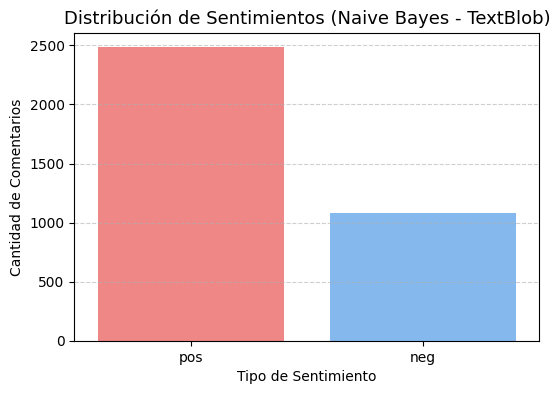

/var/folders/hx/y8xsfw254qj_h_vj_1f6p8kw0000gn/T/ipykernel_5119/4108195572.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['tb_nb_p_pos'], label='Probabilidad Positiva', shade=True, color='#55efc4')
/var/folders/hx/y8xsfw254qj_h_vj_1f6p8kw0000gn/T/ipykernel_5119/4108195572.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['tb_nb_p_neg'], label='Probabilidad Negativa', shade=True, color='#fab1a0')


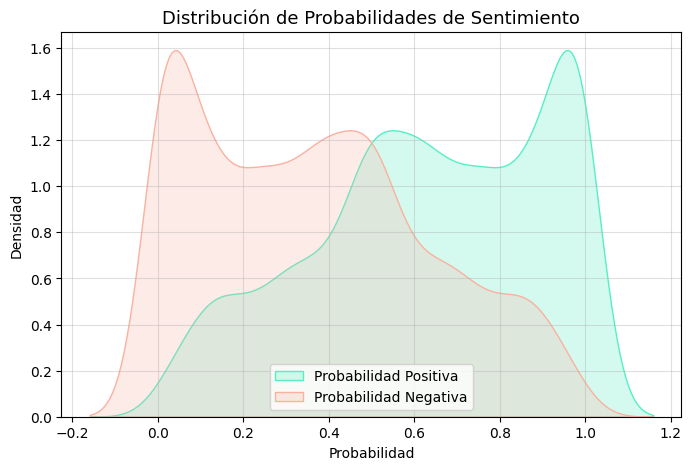

In [49]:
# Análisis de las variables obtenidas

import matplotlib.pyplot as plt
import seaborn as sns

conteo = df['tb_nb_label'].value_counts().reset_index()
conteo.columns = ['Sentimiento', 'Cantidad']

print("Distribución de sentimientos:")
print(conteo)
conteo['Porcentaje (%)'] = round((conteo['Cantidad'] / conteo['Cantidad'].sum()) * 100, 2)
display(conteo)

# Gráfico de barras para sentimientos
plt.figure(figsize=(6,4))
sns.barplot(x='Sentimiento', y='Cantidad', data=conteo, palette=['#ff7675', '#74b9ff'])
plt.title('Distribución de Sentimientos (Naive Bayes - TextBlob)', fontsize=13)
plt.xlabel('Tipo de Sentimiento')
plt.ylabel('Cantidad de Comentarios')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Gráfico de distribución de probabilidades positivas y negativas
plt.figure(figsize=(8,5))
sns.kdeplot(df['tb_nb_p_pos'], label='Probabilidad Positiva', shade=True, color='#55efc4')
sns.kdeplot(df['tb_nb_p_neg'], label='Probabilidad Negativa', shade=True, color='#fab1a0')
plt.title('Distribución de Probabilidades de Sentimiento', fontsize=13)
plt.xlabel('Probabilidad')
plt.ylabel('Densidad')
plt.legend()
plt.grid(alpha=0.4)
plt.show()